In [16]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats
df = pd.read_csv(r'C:\Users\sahil\Downloads\Banking.csv')

In [2]:
df.head(), df.columns.tolist()

(  Client ID             Name  Age  Location ID Joined Bank   Banking Contact  \
 0  IND81288    Raymond Mills   24        34324  06-05-2019    Anthony Torres   
 1  IND65833    Julia Spencer   23        42205  10-12-2001  Jonathan Hawkins   
 2  IND47499   Stephen Murray   27         7314  25-01-2010     Anthony Berry   
 3  IND72498   Virginia Garza   40        34594  28-03-2019        Steve Diaz   
 4  IND60181  Melissa Sanders   46        41269  20-07-2012        Shawn Long   
 
   Nationality            Occupation Fee Structure Loyalty Classification  ...  \
 0    American  Safety Technician IV          High                   Jade  ...   
 1     African   Software Consultant          High                   Jade  ...   
 2    European    Help Desk Operator          High                   Gold  ...   
 3    American          Geologist II           Mid                 Silver  ...   
 4    American   Assistant Professor           Mid               Platinum  ...   
 
    Bank Deposits 

In [8]:
desc_stats = df.describe()
desc_stats

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [ ]:
📊 Descriptive Stats Highlights:
Age: ranges from 17 to 85 (mean: ~51)
Estimated Income: ranges from 15.9k to 522k — quite a wide spread!
Bank Loans: from 0 to 2.66 million — some clients are carrying serious debt.
Credit Card Balance: maxes out at ~14k, with a median around 2.5k
Properties Owned: from 0 to 3
Risk Weighting: from 1 to 5, with a median of 2

C:\Users\sahil\AppData\Local\Temp\ipykernel_16432\2651821388.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Risk Weighting', data=df, palette='viridis')


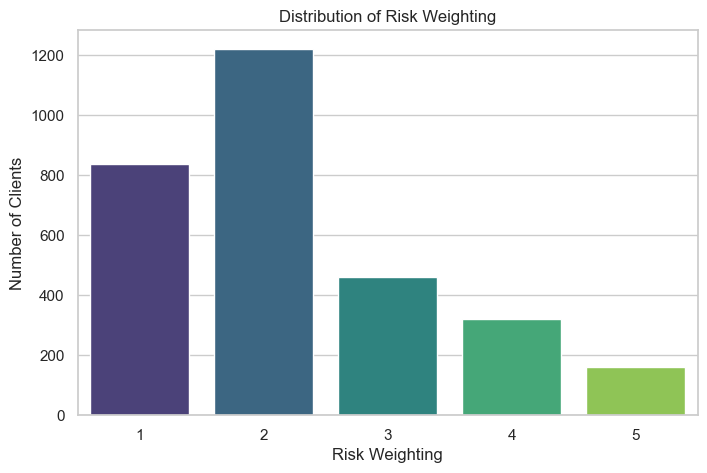

In [11]:
sns.set(style="whitegrid")

# Plot distribution of Risk Weighting
plt.figure(figsize=(8, 5))
sns.countplot(x='Risk Weighting', data=df, palette='viridis')
plt.title('Distribution of Risk Weighting')
plt.xlabel('Risk Weighting')
plt.ylabel('Number of Clients')
plt.show()

Risk Weighting	Meaning	Typical Action
1 (Very Low Risk): Highly reliable clients with excellent financial standing and repayment history	
2 (Low Risk): Low probability of default, stable income and manageable debts
3 (Medium Risk): Average risk, might have higher loans or lower income; potential to default under stress
4 (High Risk): Financially unstable, high loans compared to income, poor credit history	
5 (Very High Risk): High default risk, multiple financial red flags

In [13]:
# Filter the dataset for Risk Weighting == 5
category_5_df = df[df['Risk Weighting'] == 5]

# Calculate key stats for this group
num_clients = category_5_df.shape[0]
avg_income = category_5_df['Estimated Income'].mean()
avg_loans = category_5_df['Bank Loans'].mean()
avg_credit_card_balance = category_5_df['Credit Card Balance'].mean()
avg_properties_owned = category_5_df['Properties Owned'].mean()
avg_business_lending = category_5_df['Business Lending'].mean()

# Combine results into a dictionary for display
category_5_stats = {
    'Number of Clients': num_clients,
    'Average Estimated Income': avg_income,
    'Average Bank Loans': avg_loans,
    'Average Credit Card Balance': avg_credit_card_balance,
    'Average Properties Owned': avg_properties_owned,
    'Average Business Lending': avg_business_lending
}

category_5_stats

{'Number of Clients': 160,
 'Average Estimated Income': 310040.981875,
 'Average Bank Loans': 975216.615625,
 'Average Credit Card Balance': 5299.8620625,
 'Average Properties Owned': 1.625,
 'Average Business Lending': 1318393.3591875}

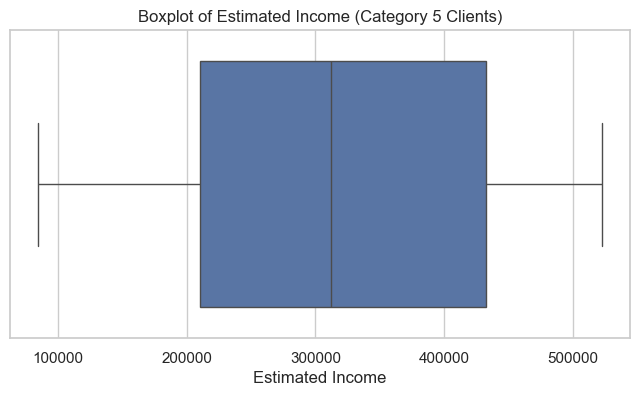

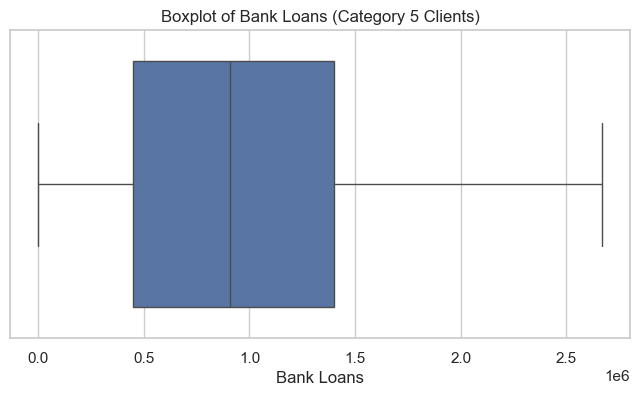

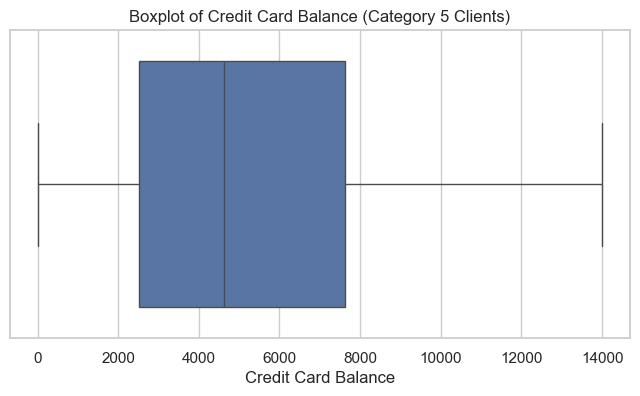

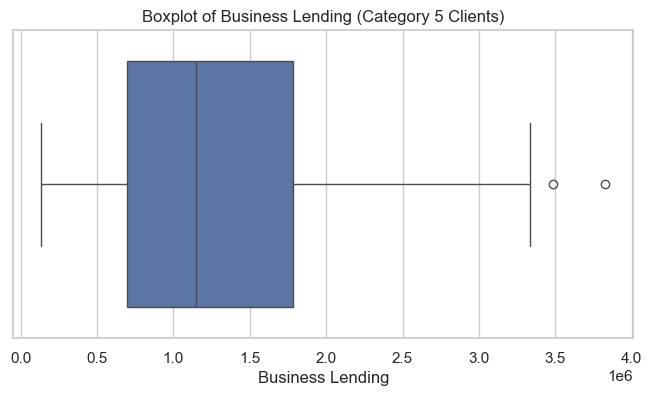

Empty DataFrame
Columns: [Estimated Income, Bank Loans, Credit Card Balance, Business Lending, Client ID]
Index: []


In [17]:
category_5_df = df[df['Risk Weighting'] == 5]

# List of financial indicators to check for outliers
financial_columns = ['Estimated Income', 'Bank Loans', 'Credit Card Balance', 'Business Lending']

# Step 1: Plot Boxplots
for col in financial_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=category_5_df[col])
    plt.title(f'Boxplot of {col} (Category 5 Clients)')
    plt.show()

# Step 2: Calculate Z-scores and identify outliers
z_scores = stats.zscore(category_5_df[financial_columns])
abs_z_scores = abs(z_scores)

# Flag outliers: any value with a z-score > 3
outliers = (abs_z_scores > 3)

# Create a DataFrame with flagged outliers
outlier_summary = pd.DataFrame(outliers, columns=financial_columns)
outlier_summary['Client ID'] = category_5_df['Client ID'].values

# Show clients flagged as outliers in any column
flagged_clients = outlier_summary[(outlier_summary[financial_columns] == True).any(axis=1)]
print(flagged_clients)

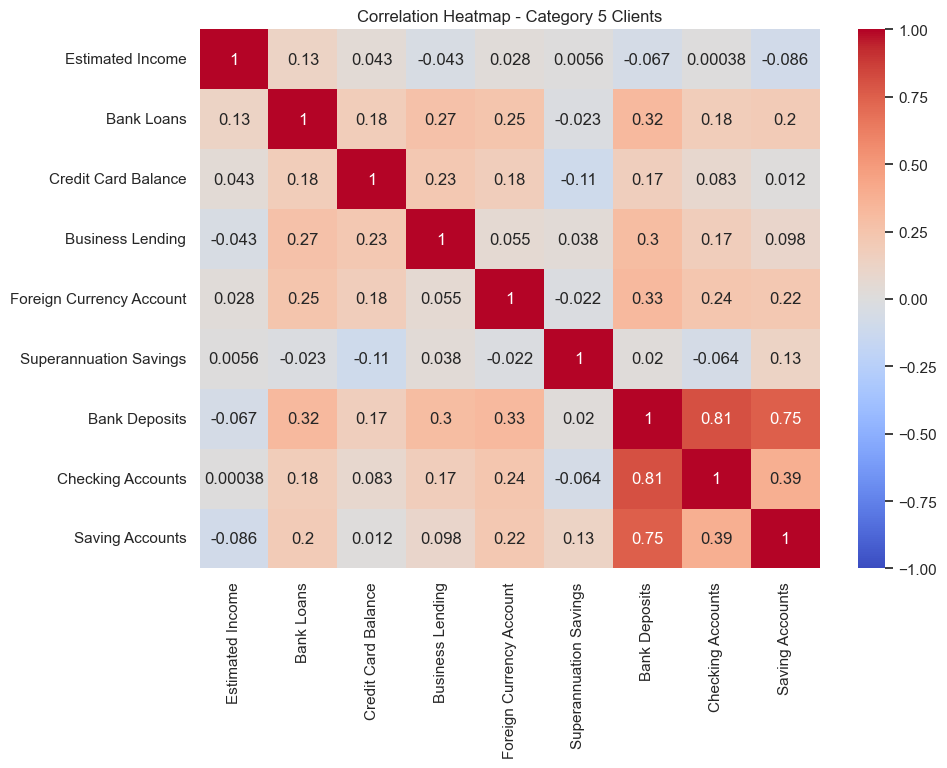

In [18]:
financial_columns = [
    'Estimated Income',
    'Bank Loans',
    'Credit Card Balance',
    'Business Lending',
    'Foreign Currency Account',
    'Superannuation Savings',
    'Bank Deposits',
    'Checking Accounts',
    'Saving Accounts'
]

# Compute correlation matrix
corr_matrix = category_5_df[financial_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap - Category 5 Clients')
plt.show()

In [20]:
features = ['Estimated Income', 'Bank Loans', 'Credit Card Balance', 'Business Lending', 'Properties Owned']
X = df[features]
y = (df['Risk Weighting'] >= 4).astype(int)  # 1 = high risk, 0 = low/medium risk

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[757   7]
 [ 98  38]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       764
           1       0.84      0.28      0.42       136

    accuracy                           0.88       900
   macro avg       0.86      0.64      0.68       900
weighted avg       0.88      0.88      0.86       900



In [24]:
new_client = pd.DataFrame({
    'Estimated Income': [200000],
    'Bank Loans': [900000],
    'Credit Card Balance': [8000],
    'Business Lending': [500000],
    'Properties Owned': [1]
})

prediction = model.predict(new_client)
print("Predicted Risk Category (1=High Risk, 0=Low/Medium):", prediction[0])

Predicted Risk Category (1=High Risk, 0=Low/Medium): 0


In [27]:
young_clients = df[df['Age'] < 30]
print(young_clients[['Name', 'Age', 'Estimated Income', 'Risk Weighting']])

                 Name  Age  Estimated Income  Risk Weighting
0       Raymond Mills   24          75384.77               2
1       Julia Spencer   23         289834.31               3
2      Stephen Murray   27         169935.23               3
5       Samuel Hudson   23         118326.96               2
22     Aaron Marshall   26         308182.93               5
...               ...  ...               ...             ...
2970    Joshua Turner   19         361904.20               3
2975  Richard Simpson   26          47530.50               1
2982     Harold Young   29         132736.50               2
2983      Bruce White   28         119770.60               2
2989     Kevin Warren   26          61624.00               2

[564 rows x 4 columns]


In [29]:
# Further filter for high-risk young clients
high_risk_young_clients = young_clients[young_clients['Risk Weighting'] >= 4]

# Display them
print(high_risk_young_clients[['Name', 'Age', 'Estimated Income', 'Risk Weighting']])

# Optional: Count how many there are
print(f'Total number of high-risk young clients: {high_risk_young_clients.shape[0]}')

                  Name  Age  Estimated Income  Risk Weighting
22      Aaron Marshall   26         308182.93               5
40       Philip Fisher   27         319205.91               4
78        Alice Chavez   29         198553.59               4
96     Lawrence Gibson   25         447928.06               5
144        Brian Smith   26         390608.46               4
...                ...  ...               ...             ...
2817  Annie Washington   25         291604.58               5
2828     Ruth Mitchell   20         116590.79               5
2908      James Fuller   28         383780.43               5
2939       Marie Burns   23         259991.82               4
2963     Gregory Meyer   28         113891.52               4

[89 rows x 4 columns]
Total number of high-risk young clients: 89


In [30]:
print(high_risk_young_clients[['Estimated Income', 'Bank Loans', 'Credit Card Balance']].mean())


Estimated Income       292199.903596
Bank Loans             895100.716292
Credit Card Balance      4176.482022
dtype: float64


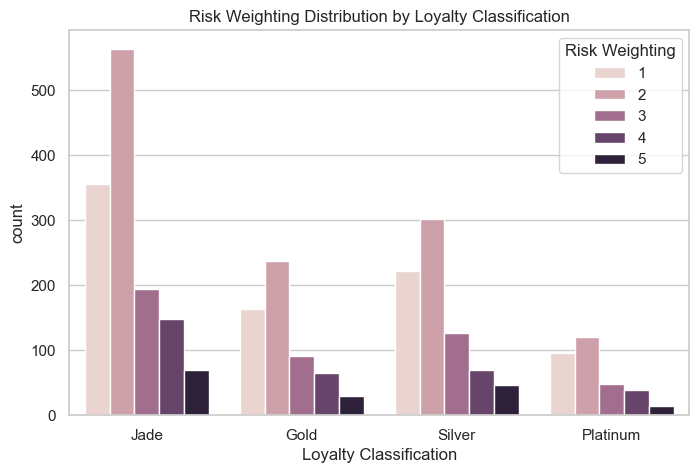

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(x='Loyalty Classification', hue='Risk Weighting', data=df)
plt.title('Risk Weighting Distribution by Loyalty Classification')
plt.show()

In [33]:
high_risk_counts = df[df['Risk Weighting'] >= 4].groupby('Loyalty Classification').size()
print(high_risk_counts)


Loyalty Classification
Gold         94
Jade        218
Platinum     53
Silver      117
dtype: int64
